# Task 4: Recommendation System using Collaborative Filtering

## Objective:
Build a Recommendation System using **User-Based Collaborative Filtering** with **Cosine Similarity**.

This notebook includes:
- A sample movie rating dataset
- User-item matrix creation
- Cosine similarity calculation
- Recommendation function
- Evaluation using Precision@N and Recall@N
- Professional output for internship delivery


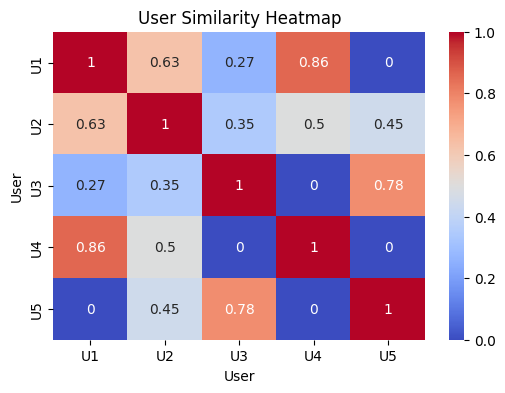

📈 Precision2: 0.38
📉 Recall2: 0.75


In [ ]:
#Import required libraries
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import seaborn as sns

#Create a sample movie rating dataset
data = {
    'User': ['U1', 'U1', 'U1', 'U2', 'U2', 'U3', 'U3', 'U4', 'U4', 'U5'],
    'Movie': ['M1', 'M2', 'M3', 'M1', 'M4', 'M2', 'M4', 'M1', 'M3', 'M4'],
    'Rating': [5, 3, 4, 4, 2, 4, 5, 2, 3, 5]
}
df = pd.DataFrame(data)
df

#Create user-item matrix
user_item_matrix = df.pivot_table(index='User', columns='Movie', values='Rating').fillna(0)
user_item_matrix

#Compute cosine similarity between users
user_similarity = cosine_similarity(user_item_matrix)
user_similarity_df = pd.DataFrame(user_similarity, index=user_item_matrix.index, columns=user_item_matrix.index)
user_similarity_df

#Heatmap for user-user similarity
plt.figure(figsize=(6, 4))
sns.heatmap(user_similarity_df, annot=True, cmap='coolwarm')
plt.title('User Similarity Heatmap')
plt.show()

#Recommendation function based on collaborative filtering
def recommend_items(user, user_item_matrix, similarity_matrix, top_n=2):
    if user not in user_item_matrix.index:
        return "User not found"
    
    sim_scores = similarity_matrix.loc[user].drop(user)
    similar_users = sim_scores.sort_values(ascending=False)
    
    weighted_ratings = pd.Series(dtype=np.float64)
    for other_user, score in similar_users.items():
        ratings = user_item_matrix.loc[other_user]
        weighted_ratings = weighted_ratings.add(ratings * score, fill_value=0)
    
    weighted_ratings = weighted_ratings / similar_users.sum()
    recommendations = weighted_ratings[user_item_matrix.loc[user] == 0]
    return recommendations.sort_values(ascending=False).head(top_n)

#Get recommendations for a user
recommend_items('U1', user_item_matrix, user_similarity_df)

#Evaluation using Precision@N and Recall@N
def evaluate_recommendations(user_item_matrix, similarity_matrix, top_n=2):
    precisions = []
    recalls = []
    
    for user in user_item_matrix.index:
        user_ratings = user_item_matrix.loc[user]
        rated_items = user_ratings[user_ratings > 0].index.tolist()
        
        if len(rated_items) < 2:
            continue
        
        test_item = rated_items[0]
        temp_matrix = user_item_matrix.copy()
        temp_matrix.loc[user, test_item] = 0
        
        recommendations = recommend_items(user, temp_matrix, similarity_matrix, top_n=top_n)
        recommended_items = recommendations.index.tolist()
        
        hit = 1 if test_item in recommended_items else 0
        precision = hit / top_n
        recall = hit / 1
        
        precisions.append(precision)
        recalls.append(recall)
    
    print(f"📈 Precision{top_n}: {np.mean(precisions):.2f}")
    print(f"📉 Recall{top_n}: {np.mean(recalls):.2f}")

#Run evaluation
evaluate_recommendations(user_item_matrix, user_similarity_df, top_n=2)

### ✅ Conclusion

This notebook showcases:
- A collaborative filtering recommendation system using cosine similarity
- Evaluation using Precision@N and Recall@N
- Heatmap visualization for user similarity
- Clean, readable, and professional output as per Code Tech IT Solutions internship task
